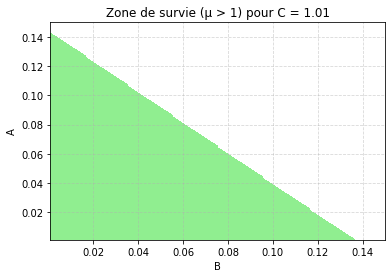

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def mu(A, B, C, p=0.5, jmax=100):
    total = 0
    for j in range(1, jmax + 1):
        term = comb(2 * j, j) * (p * (1 - p))**j
        exp_part = np.exp(-2 * A * j - B * (C**(2 * j) - 1) / (C - 1))
        total += term * exp_part
    return total

# Grille de valeurs
A_vals = np.linspace(0.001, 0.15, 150)
B_vals = np.linspace(0.001, 0.15, 150)
C = 1.01  

# Calcul sur la grille
mu_grid = np.zeros((len(A_vals), len(B_vals)))
for i, A in enumerate(A_vals):
    for j, B in enumerate(B_vals):
        mu_grid[i, j] = mu(A, B, C)

# Tracé de la zone mu > 1
plt.contourf(B_vals, A_vals, mu_grid > 1, levels=[0, 0.5, 1], colors=["white", "lightgreen"])
plt.xlabel("B")
plt.ylabel("A")
plt.title(f"Zone de survie (μ > 1) pour C = {C}")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


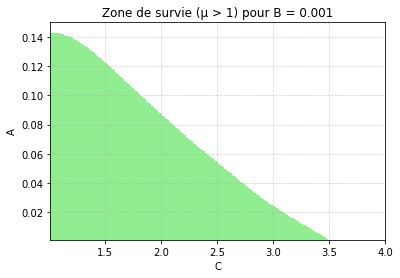

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def mu(A, B, C, p=0.5, jmax=100):
    total = 0
    for j in range(1, jmax + 1):
        term = comb(2 * j, j) * (p * (1 - p))**j
        exp_part = np.exp(-2 * A * j - B * (C**(2 * j) - 1) / (C - 1))
        total += term * exp_part
    return total

# Grille de valeurs
A_vals = np.linspace(0.001, 0.15, 150)
C_vals = np.linspace(1.01, 4, 300)
B = 0.001  

# Calcul sur la grille
mu_grid = np.zeros((len(A_vals), len(C_vals)))
for i, A in enumerate(A_vals):
    for j, C in enumerate(C_vals):
        mu_grid[i, j] = mu(A, B, C)

# Tracé de la zone mu > 1
plt.contourf(C_vals, A_vals, mu_grid > 1, levels=[0, 0.5, 1], colors=["white", "lightgreen"])
plt.xlabel("C")
plt.ylabel("A")
plt.title(f"Zone de survie (μ > 1) pour B = {B}")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

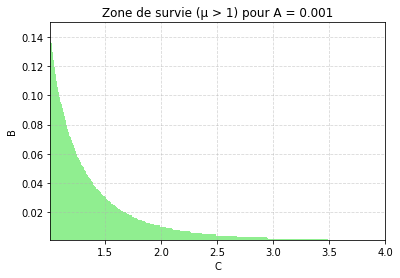

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def mu(A, B, C, p=0.5, jmax=100):
    total = 0
    for j in range(1, jmax + 1):
        term = comb(2 * j, j) * (p * (1 - p))**j
        exp_part = np.exp(-2 * A * j - B * (C**(2 * j) - 1) / (C - 1))
        total += term * exp_part
    return total

# Grille de valeurs
B_vals = np.linspace(0.001, 0.15, 150)
C_vals = np.linspace(1.01, 4, 300)
A = 0.001  

# Calcul sur la grille
mu_grid = np.zeros((len(B_vals), len(C_vals)))
for i, B in enumerate(B_vals):
    for j, C in enumerate(C_vals):
        mu_grid[i, j] = mu(A, B, C)

# Tracé de la zone mu > 1
plt.contourf(C_vals, B_vals, mu_grid > 1, levels=[0, 0.5, 1], colors=["white", "lightgreen"])
plt.xlabel("C")
plt.ylabel("B")
plt.title(f"Zone de survie (μ > 1) pour A = {A}")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

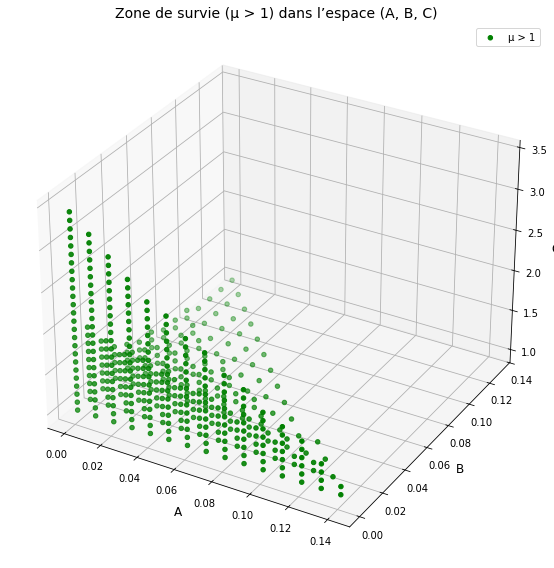

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def calculer_mu(A, B, C, p=0.5, jmax=100):
    total = 0
    for j in range(1, jmax + 1):
        term = comb(2 * j, j) * (p * (1 - p))**j
        exp_part = np.exp(-2 * A * j - B * (C**(2 * j) - 1) / (C - 1))
        total += term * exp_part
    return total

# Grilles de A, B, C
A_vals = np.linspace(0.001, 0.151, 16)
B_vals = np.linspace(0.001, 0.151, 16)
C_vals = np.linspace(1.01, 4.01, 31)

# Création des points 3D
points_A, points_B, points_C = [], [], []
colors = []

for A in A_vals:
    for B in B_vals:
        for C in C_vals:
            mu = calculer_mu(A, B, C, p=0.5, jmax=100)
            if mu > 1:
                points_A.append(A)
                points_B.append(B)
                points_C.append(C)
                colors.append("green")

# Tracé 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points_A, points_B, points_C, c=colors, marker='o', label="μ > 1")

ax.set_xlabel("A", fontsize=12)
ax.set_ylabel("B", fontsize=12)
ax.set_zlabel("C", fontsize=12)
ax.set_title("Zone de survie (μ > 1) dans l’espace (A, B, C)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [1]:
import numpy as np
from scipy.special import comb
import plotly.graph_objects as go

def calculer_mu(A, B, C, p=0.5, jmax=100):
    total = 0
    for j in range(1, jmax + 1):
        term = comb(2 * j, j) * (p * (1 - p))**j
        exp_part = np.exp(-2 * A * j - B * (C**(2 * j) - 1) / (C - 1))
        total += term * exp_part
    return total

# Grilles de A, B, C
A_vals = np.linspace(0.001, 0.151, 16)
B_vals = np.linspace(0.001, 0.151, 16)
C_vals = np.linspace(1.01, 4.01, 31)

# Création de la grille 3D
A_grid, B_grid, C_grid = np.meshgrid(A_vals, B_vals, C_vals, indexing='ij')
mu_grid = np.zeros_like(A_grid)

# Calcul de mu sur toute la grille
for i in range(A_grid.shape[0]):
    for j in range(B_grid.shape[1]):
        for k in range(C_grid.shape[2]):
            A = A_grid[i, j, k]
            B = B_grid[i, j, k]
            C = C_grid[i, j, k]
            mu_grid[i, j, k] = calculer_mu(A, B, C)

# Tracé volumique
fig = go.Figure(data=go.Isosurface(
    x=A_grid.flatten(),
    y=B_grid.flatten(),
    z=C_grid.flatten(),
    value=mu_grid.flatten(),
    isomin=1.0,
    isomax=mu_grid.max(),
    surface_count=2,
    colorscale='Greens',
    caps=dict(x_show=False, y_show=False, z_show=False),
    colorbar_title='μ'
))

fig.update_layout(
    scene=dict(
        xaxis_title='A',
        yaxis_title='B',
        zaxis_title='C',
    ),
    title='Isosurface de μ > 1 dans l’espace (A, B, C)',
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()

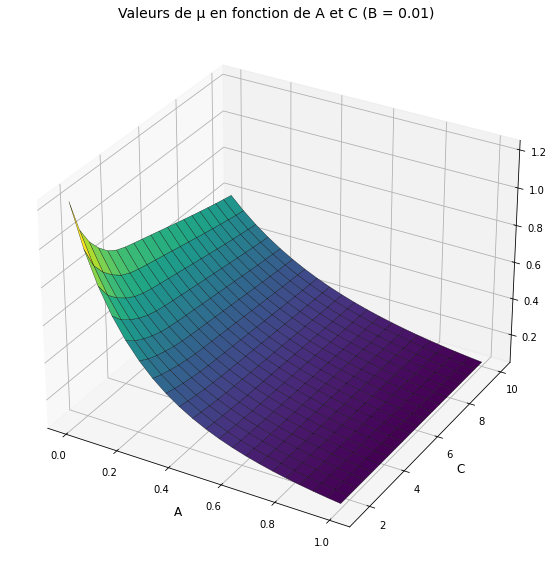

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import binom

# Paramètres
p = 0.5
max_age = 100

# Fonction alpha(t) selon Makeham discrète
def alpha(t, A, B, C):
    return np.exp(-A - B * (C**t - 1) / (C - 1))

# Fonction mu pour un triplet (A, B, C)
def calculer_mu(A, B, C, p):
    mu = 0.0
    for i in range(1, max_age + 1):
        survie = np.prod([alpha(t, A, B, C) for t in range(i)])
        if i % 2 == 0:
            j = i // 2
            proba_origine = binom.pmf(j, 2*j, p)
            mu += survie * proba_origine
    return mu

# Grilles de A et C (B fixé)
A_vals = np.linspace(0, 1, 21)
C_vals = np.linspace(1.5, 10, 20)
B_fixed = 0.01

A_grid, C_grid = np.meshgrid(A_vals, C_vals)
mu_grid = np.zeros_like(A_grid)

# Calcul des valeurs de mu sur la grille
for i in range(A_grid.shape[0]):
    for j in range(A_grid.shape[1]):
        A = A_grid[i, j]
        C = C_grid[i, j]
        mu_grid[i, j] = calculer_mu(A, B_fixed, C, p)

# Tracé 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A_grid, C_grid, mu_grid, cmap='viridis', edgecolor='k', linewidth=0.3)

ax.set_xlabel("A", fontsize=12)
ax.set_ylabel("C", fontsize=12)
ax.set_zlabel("μ", fontsize=12)
ax.set_title(f"Valeurs de μ en fonction de A et C (B = {B_fixed})", fontsize=14)
plt.tight_layout()
plt.show()
